In [1]:
# Step 1 - Pick K random points as cluster centers called centroids.
# Step 2 - Assign each point to nearest cluster by calculating its distance to each centroid.
# Step 3 - Find new cluster center by taking the average of the assigned points.
# Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


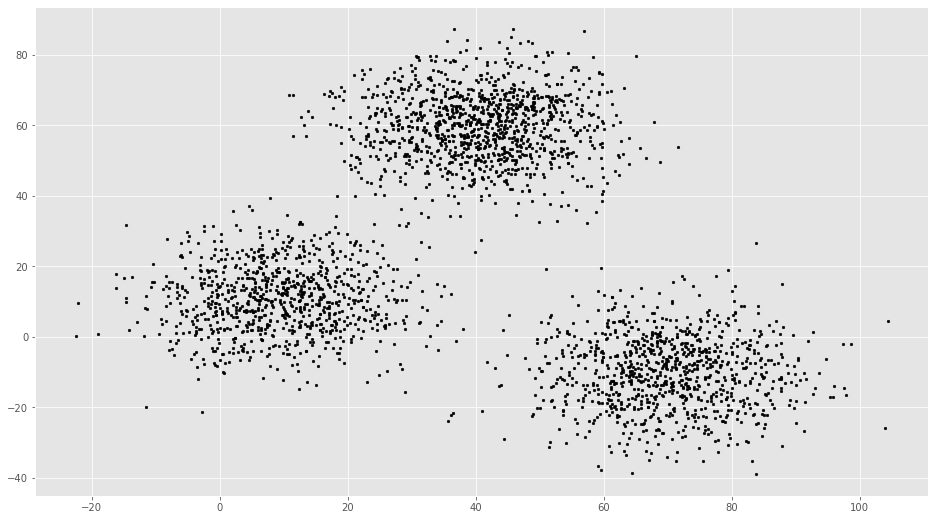

In [4]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.figure(figsize=(16,9))
plt.scatter(f1, f2, c='black', s=7)

In [5]:
len(X)
#X[0:5]

3000

In [6]:
# Euclidean Distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [7]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[60. 80.]
 [78. 55.]
 [28. 48.]]


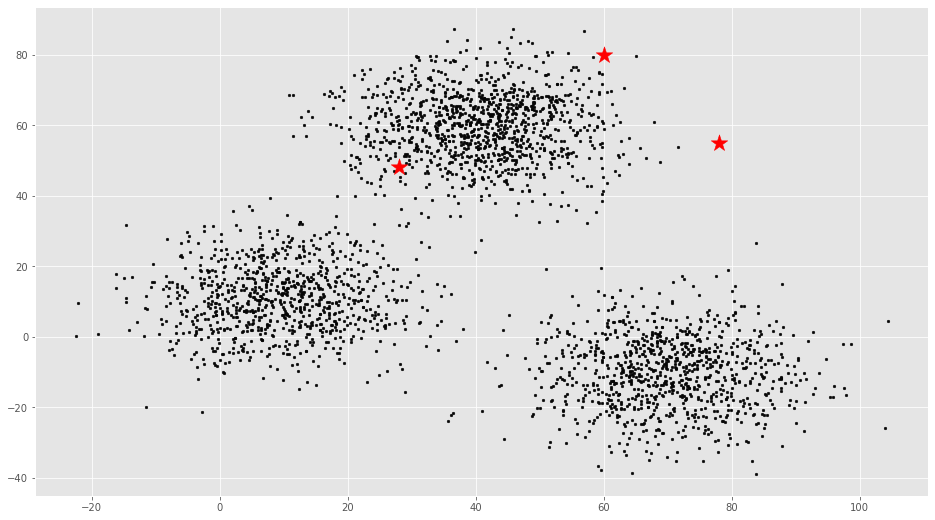

In [8]:
# Plotting along with the Centroids
plt.figure(figsize=(16,9))
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=300, c='r')

In [9]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

In [10]:
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [11]:
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

In [12]:
clusters

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
def plotData(points,clusters,C):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    plt.figure(figsize=(16,9))
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    plt.show()

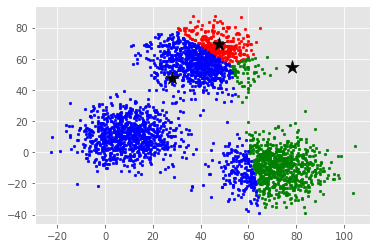

<Figure size 1152x648 with 0 Axes>

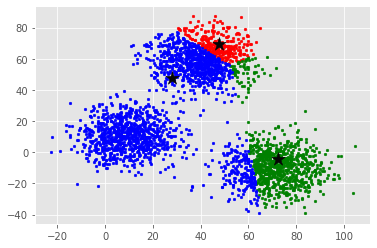

<Figure size 1152x648 with 0 Axes>

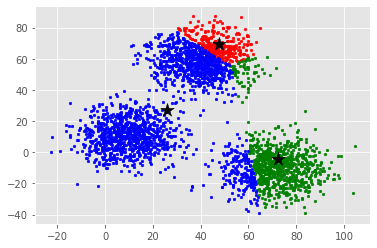

<Figure size 1152x648 with 0 Axes>

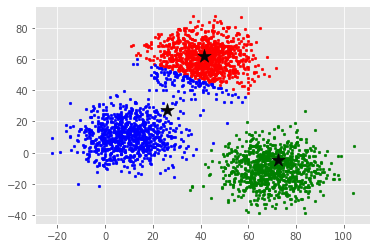

<Figure size 1152x648 with 0 Axes>

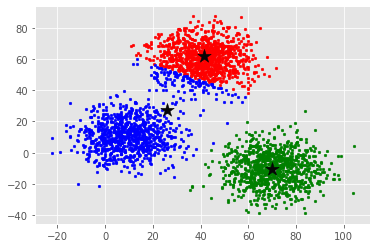

<Figure size 1152x648 with 0 Axes>

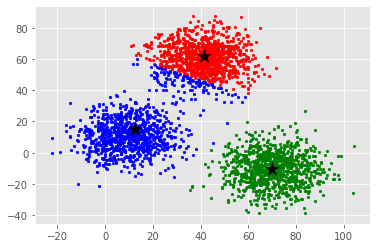

<Figure size 1152x648 with 0 Axes>

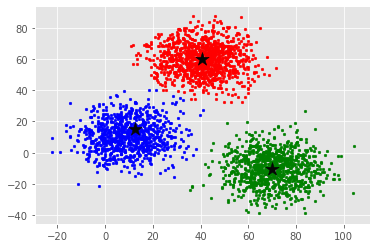

<Figure size 1152x648 with 0 Axes>

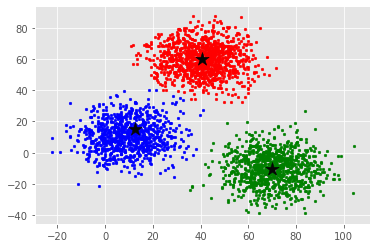

<Figure size 1152x648 with 0 Axes>

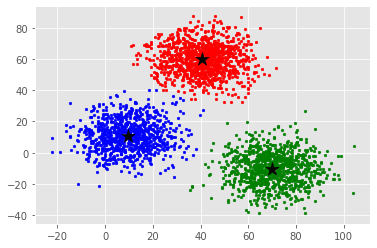

<Figure size 1152x648 with 0 Axes>

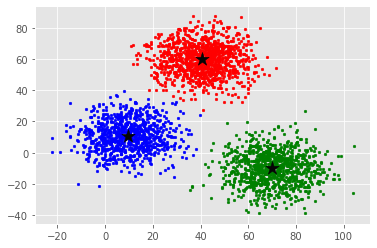

<Figure size 1152x648 with 0 Axes>

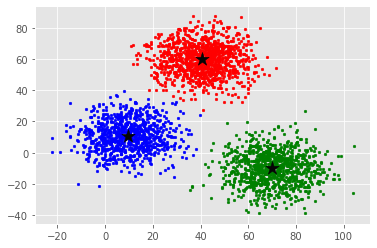

<Figure size 1152x648 with 0 Axes>

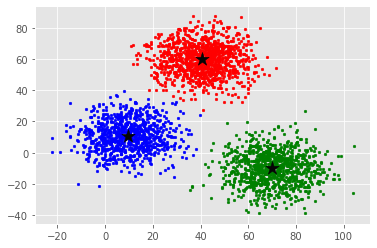

<Figure size 1152x648 with 0 Axes>

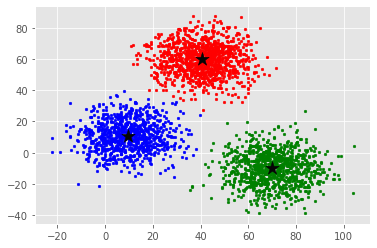

<Figure size 1152x648 with 0 Axes>

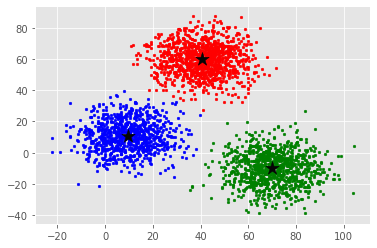

<Figure size 1152x648 with 0 Axes>

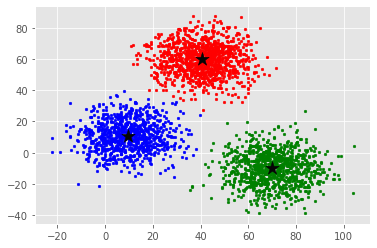

<Figure size 1152x648 with 0 Axes>

In [14]:
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
#         print("Distance is",distances)
        cluster = np.argmin(distances)
#         print("Cluster is",cluster)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
#         print(points)
        C[i] = np.mean(points, axis=0)
        plotData(points, clusters, C)
    error = dist(C, C_old, None)

In [15]:
C

array([[  9.478045,  10.686052],
       [ 69.92419 , -10.119641],
       [ 40.683628,  59.715893]], dtype=float32)